# OBSOLETO &rarr; guardare lo script

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def change_legend(ax, new_loc, fontsize, titlesize, **kws):
    '''funzione per modificare posizione e font size della legenda generata da seaborn'''
    
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, fontsize=fontsize, title_fontsize=titlesize, frameon = True, fancybox = False, framealpha = 0.5, **kws)
    
    return

In [32]:
# numero della run da cui leggere i dati
RUNNUMBER = 1220

In [33]:
# leggo il file di dati relativo alla run scelta
data = pd.read_csv(f'../DATA/raw_data/RUN00{RUNNUMBER}_data.txt',sep=' ')

In [34]:
# divido le due fpga
data_fpga0 = data[(data['FPGA']==0)]
data_fpga1 = data[(data['FPGA']==1)]

### Occupanza

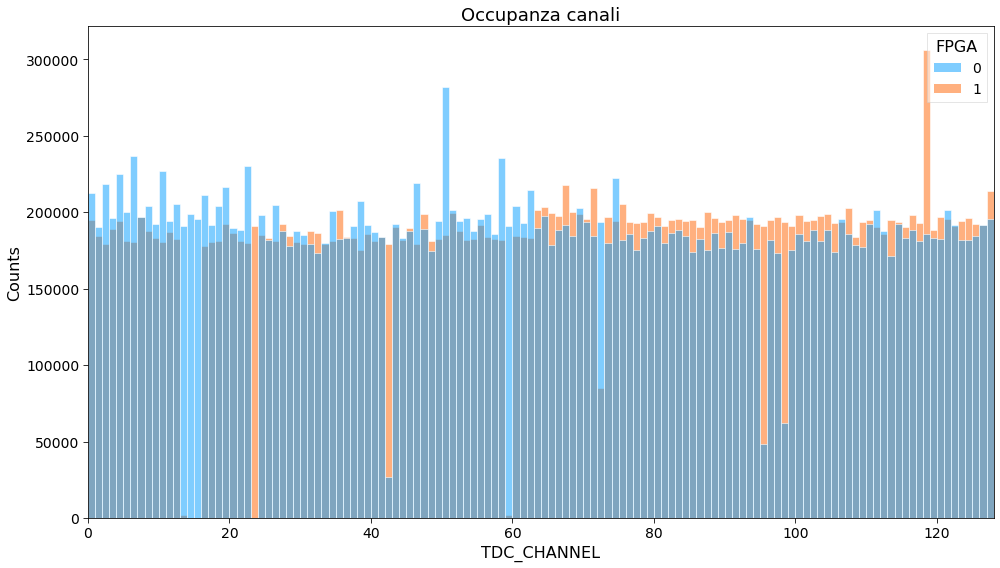

In [24]:
# FPGA0 e FPGA1 assieme
fig, ax = plt.subplots(figsize=(14,8))

ax=sns.histplot(data=data, x='TDC_CHANNEL', hue='FPGA', 
             stat='count', bins=128, common_bins=True, 
             multiple='layer', element='bars', palette=['#009cff', '#FF6300'], edgecolor='white')

ax.set_xlim(left=data['TDC_CHANNEL'].min(), right=data['TDC_CHANNEL'].max())

ax.set_title('Occupanza canali', fontsize = 18)
ax.set_xlabel('TDC_CHANNEL', fontsize = 16)
ax.set_ylabel('Counts', fontsize = 16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

change_legend(ax=ax, new_loc="upper right", fontsize=14, titlesize=16)

fig.tight_layout()
# fig.savefig(f'../PLOTS/RUN00{RUNNUMBER}_occupancy.png', dpi = 300, facecolor = 'white')

plt.show()

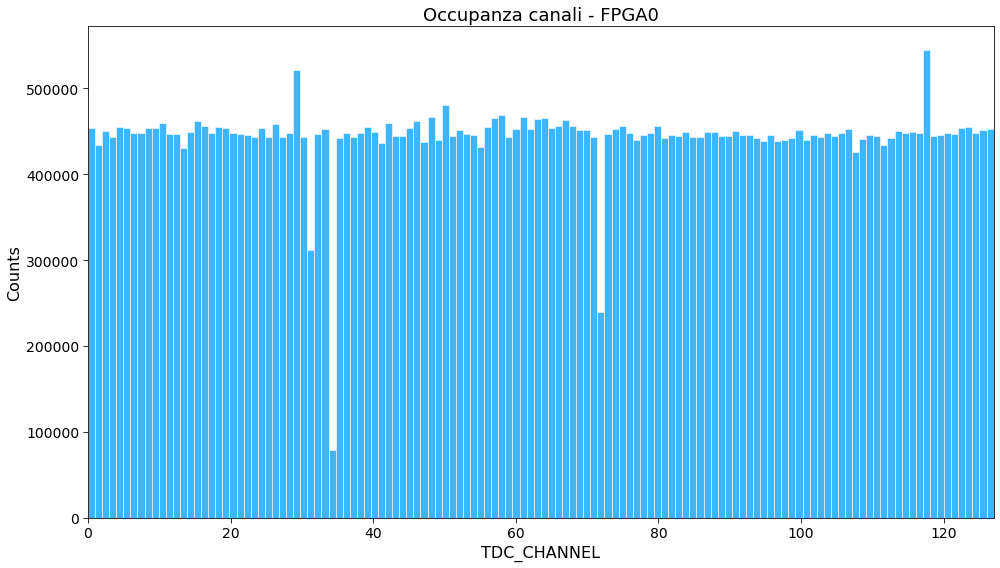

In [8]:
# FPGA0 only
fig0, ax0 = plt.subplots(figsize=(14,8))

# ax0.hist(data_fpga0['TDC_CHANNEL'], bins=128, histtype='bar', color='#009cff', edgecolor='white')

ax0=sns.histplot(data=data_fpga0, x='TDC_CHANNEL', 
             stat='count', bins=128, element='bars', fill=True, color='#009cff', edgecolor='white')

ax0.set_xlim(left=data['TDC_CHANNEL'].min(), right=data['TDC_CHANNEL'].max())

ax0.set_title('Occupanza canali - FPGA0', fontsize = 18)
ax0.set_xlabel('TDC_CHANNEL', fontsize = 16)
ax0.set_ylabel('Counts', fontsize = 16)
ax0.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

fig0.tight_layout()
fig0.savefig(f'../PLOTS/RUN00{RUNNUMBER}_occupancy_fpga0.png', dpi = 300, facecolor = 'white')

plt.show()

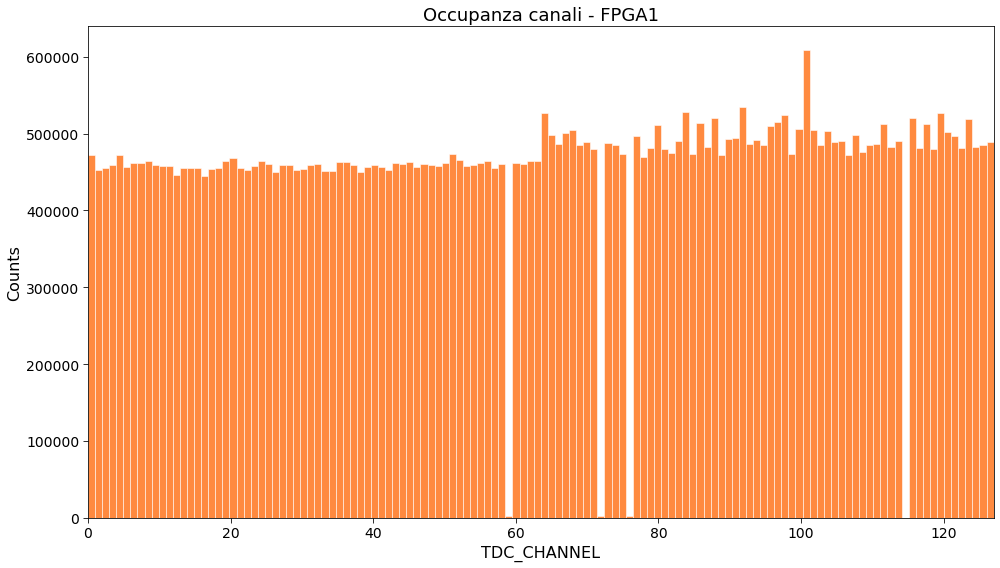

In [9]:
# FPGA1 only
fig1, ax1 = plt.subplots(figsize=(14,8))


# ax1.hist(data_fpga1['TDC_CHANNEL'], bins=128, histtype='bar', color='#FF6300')

ax1=sns.histplot(data=data_fpga1, x='TDC_CHANNEL', 
             stat='count', bins=128, element='bars', fill=True, color='#FF6300', edgecolor='white')

ax1.set_xlim(left=data['TDC_CHANNEL'].min(), right=data['TDC_CHANNEL'].max())

ax1.set_title('Occupanza canali - FPGA1', fontsize = 18)
ax1.set_xlabel('TDC_CHANNEL', fontsize = 16)
ax1.set_ylabel('Counts', fontsize = 16)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

fig1.tight_layout()
fig1.savefig(f'../PLOTS/RUN00{RUNNUMBER}_occupancy_fpga1.png', dpi = 300, facecolor = 'white')

plt.show()

### FPGA Canale 138 ??

In [13]:
# leggo il file di dati relativo alla run scelta
data = pd.read_csv(f'../DATA/RUN00{RUNNUMBER}_data.txt',sep=' ')

In [14]:
# tolgo dati inutili per l'analisi dell'occupanza, come ad esempio lo scintillatore
data = data[(data['TDC_CHANNEL']!=128)]

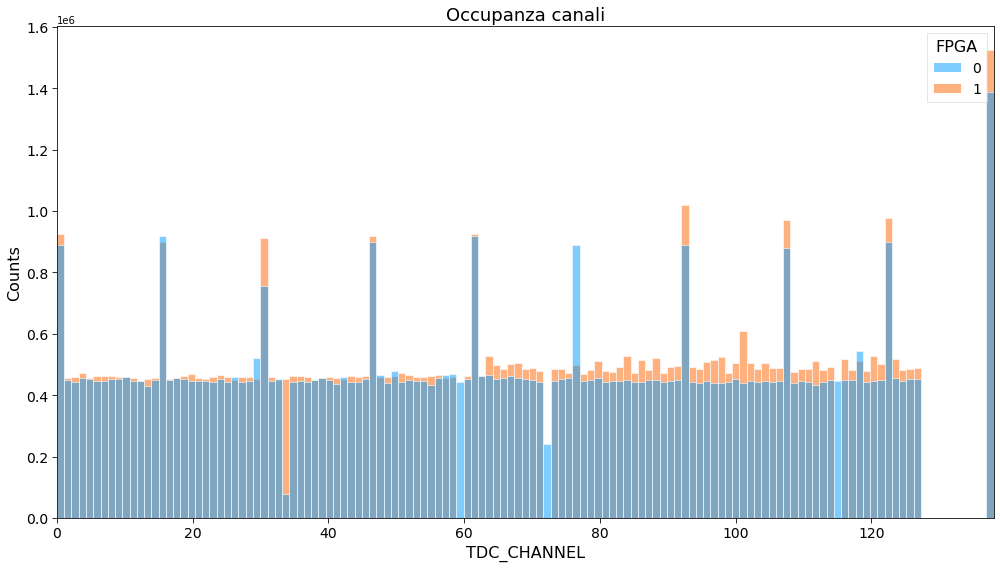

In [16]:
# FPGA0 e FPGA1 assieme
fig, ax = plt.subplots(figsize=(14,8))

ax=sns.histplot(data=data, x='TDC_CHANNEL', hue='FPGA', 
             stat='count', bins=129, common_bins=True, 
             multiple='layer', element='bars', palette=['#009cff', '#FF6300'], edgecolor='white')

ax.set_xlim(left=data['TDC_CHANNEL'].min(), right=data['TDC_CHANNEL'].max())

ax.set_title('Occupanza canali', fontsize = 18)
ax.set_xlabel('TDC_CHANNEL', fontsize = 16)
ax.set_ylabel('Counts', fontsize = 16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

change_legend(ax=ax, new_loc="upper right", fontsize=14, titlesize=16)

fig.tight_layout()
# fig.savefig(f'../PLOTS/RUN00{RUNNUMBER}_occupancy.png', dpi = 300, facecolor = 'white')

plt.show()

### Rate

In [10]:
PROTON_PERIOD_LHC = 90*1e-6 # seconds

In [11]:
acq_window = data['ORBIT_CNT'].max()-data['ORBIT_CNT'].min()
acq_time = acq_window * PROTON_PERIOD_LHC
print(acq_time)

60742.432799999995


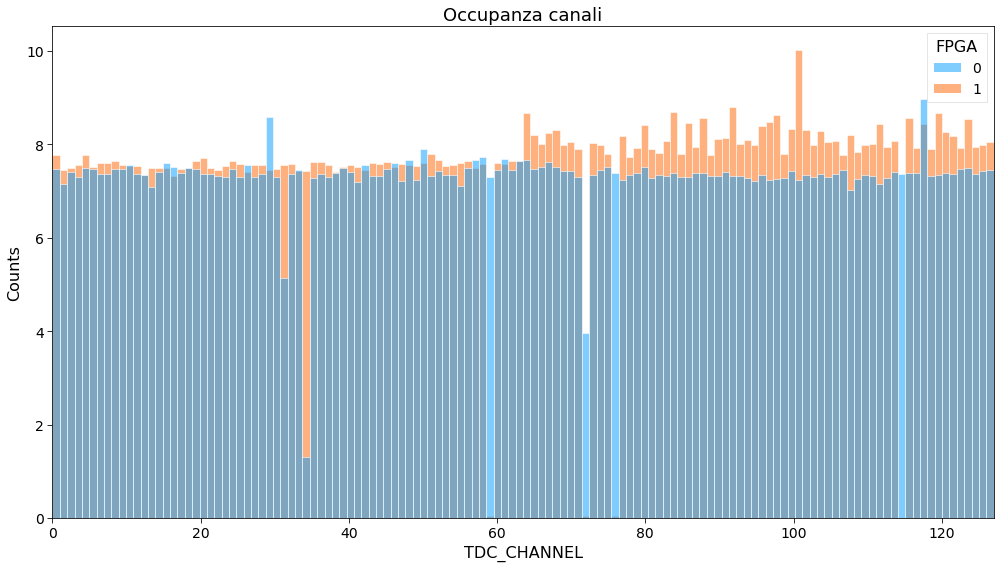

In [12]:
# FPGA0 e FPGA1 assieme
fig, ax = plt.subplots(figsize=(14,8))

ax=sns.histplot(data=data, x='TDC_CHANNEL', hue='FPGA', weights=np.full(len(data['TDC_CHANNEL']), acq_time**-1),
             stat='count', bins=128, common_bins=True, 
             multiple='layer', element='bars', palette=['#009cff', '#FF6300'], edgecolor='white')

ax.set_xlim(left=data['TDC_CHANNEL'].min(), right=data['TDC_CHANNEL'].max())

ax.set_title('Occupanza canali', fontsize = 18)
ax.set_xlabel('TDC_CHANNEL', fontsize = 16)
ax.set_ylabel('Rate', fontsize = 16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

change_legend(ax=ax, new_loc="upper right", fontsize=14, titlesize=16)

fig.tight_layout()
# fig.savefig(f'../PLOTS/RUN00{RUNNUMBER}_rate.png', dpi = 300, facecolor = 'white')

plt.show()

In [35]:
hist, bin_edges = np.histogram(data_fpga0['TDC_CHANNEL'], bins=np.arange(129))

In [36]:
print(hist.shape)
print(bin_edges.shape)

(128,)
(129,)


In [39]:
bin_edges

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128])

/lustre/cmswork/nlai/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:365: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


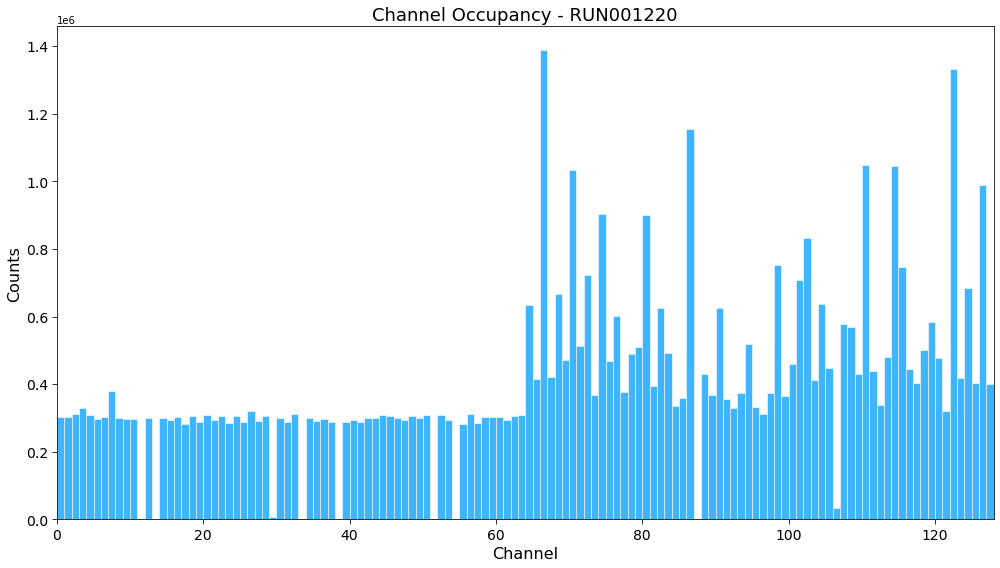

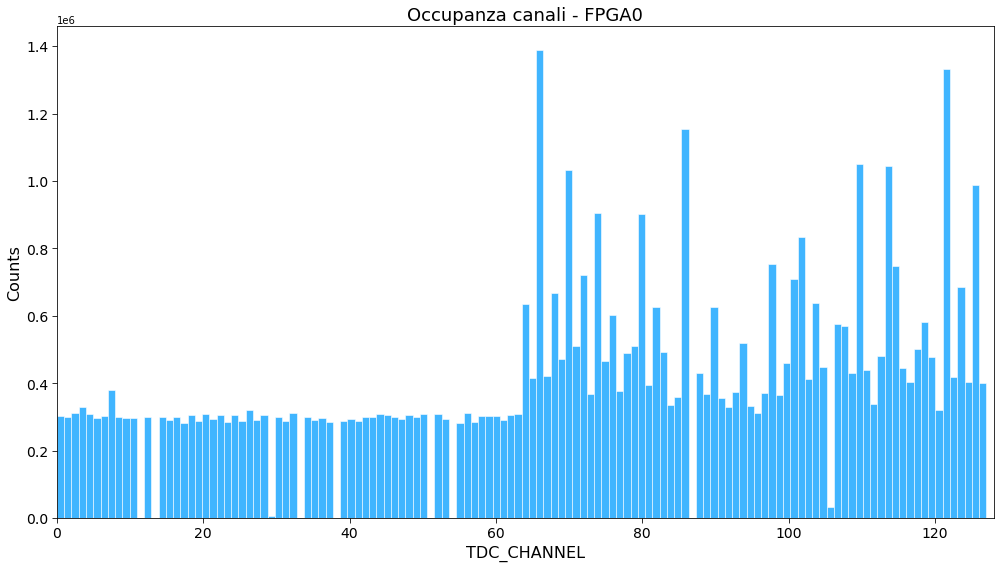

In [38]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.histplot(x=np.arange(128),  bins=bin_edges, weights=hist,
                         stat='count', element='bars', fill=True, color='#009cff', edgecolor='white')

ax.set_xlim(0, 128)

ax.set_title(f'Channel Occupancy - RUN00{RUNNUMBER}', fontsize = 18)
ax.set_xlabel('Channel', fontsize = 16)
ax.set_ylabel('Counts', fontsize = 16)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

fig.tight_layout()
plt.show()


# FPGA0 only
fig0, ax0 = plt.subplots(figsize=(14,8))

# ax0.hist(data_fpga0['TDC_CHANNEL'], bins=128, histtype='bar', color='#009cff', edgecolor='white')

ax0=sns.histplot(data=data_fpga0, x='TDC_CHANNEL', 
             stat='count', bins=128, element='bars', fill=True, color='#009cff', edgecolor='white')

ax0.set_xlim(0, 128)
ax0.set_title('Occupanza canali - FPGA0', fontsize = 18)
ax0.set_xlabel('TDC_CHANNEL', fontsize = 16)
ax0.set_ylabel('Counts', fontsize = 16)
ax0.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

fig0.tight_layout()


plt.show()